In [1]:
#to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
# reads csv file
data=pd.read_csv("data/Placement_Data_Full_Class.csv")

In [4]:
#To display first 5 rows
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
#checking for the missing value information
data.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
#To check the data types of each column
data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [7]:
#To get the dimension
data.shape

(215, 15)

In [8]:
#Summary of numerical columns
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [9]:
#Summary of object columns
data.describe(include = "O")

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


# EDA

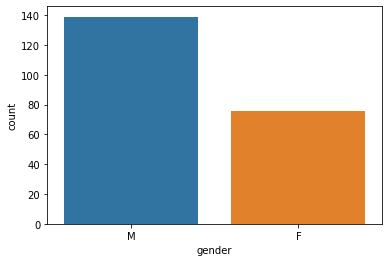

In [10]:
#Gender Count
sns.countplot("gender", data = data)
plt.show()

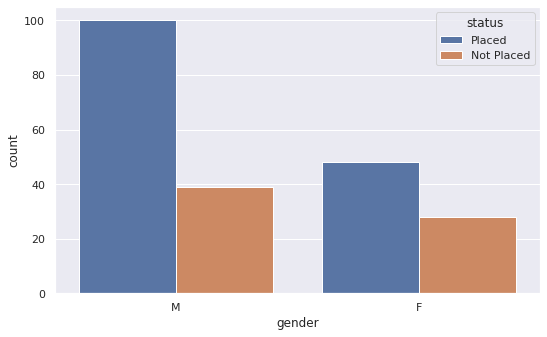

In [11]:
#Gender vs Status
sns.set(rc={'figure.figsize':(8.7,5.27)})
sns.countplot("gender", hue="status", data=data)
plt.show()

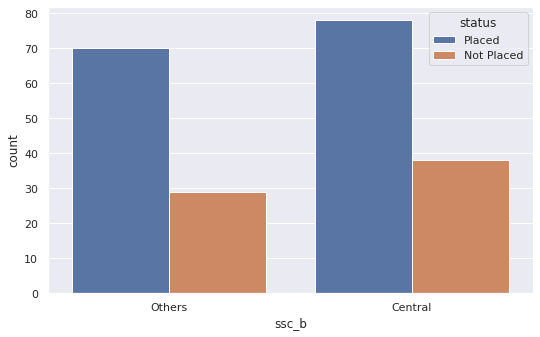

In [12]:
#ssc board vs status
sns.set(rc={'figure.figsize':(8.7,5.27)})
sns.countplot("ssc_b", hue="status", data=data)
plt.show()

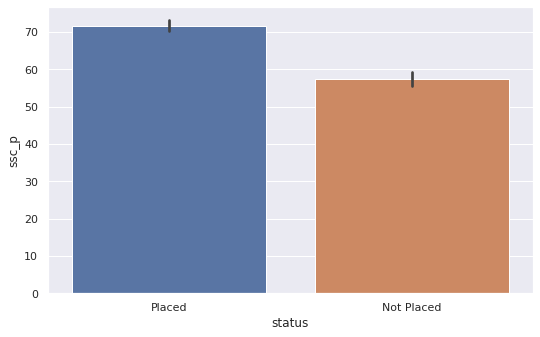

In [13]:
# status vs ssc percentage
sns.barplot(x="status", y="ssc_p", data=data)

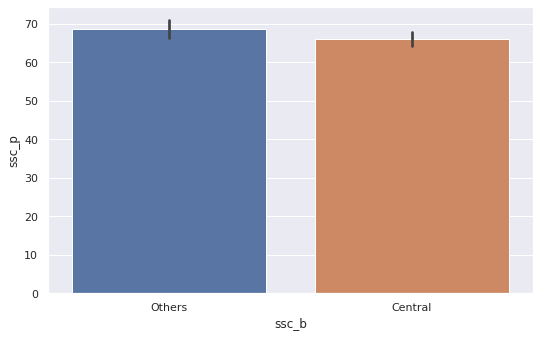

In [14]:
#ssc board vs ssc percentage
sns.barplot(x="ssc_b", y="ssc_p", data=data)

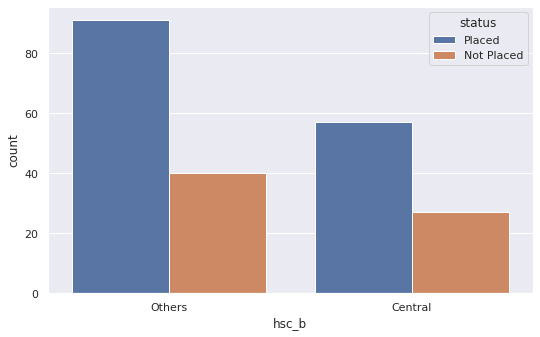

In [15]:
#hsc boad vs status
sns.countplot("hsc_b", hue="status", data=data)
plt.show()

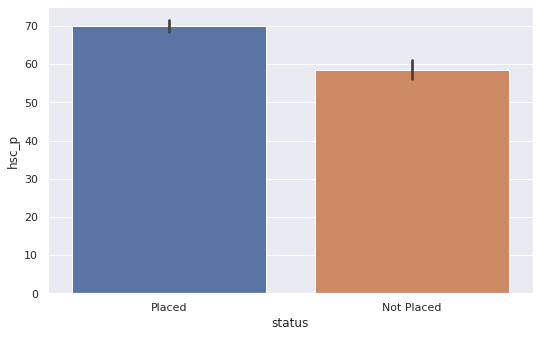

In [16]:
#hsc percentage vs status
sns.barplot(x="status", y="hsc_p", data=data)

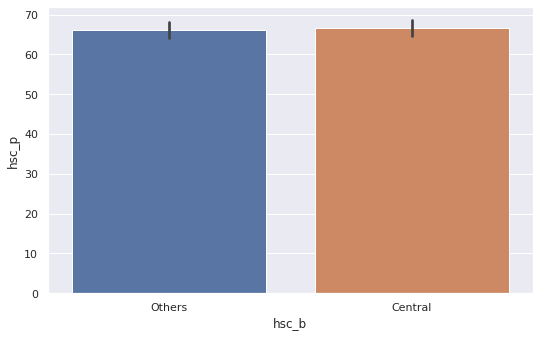

In [17]:
#hsc board vs hsc percentage
sns.barplot(x="hsc_b", y="hsc_p", data=data)

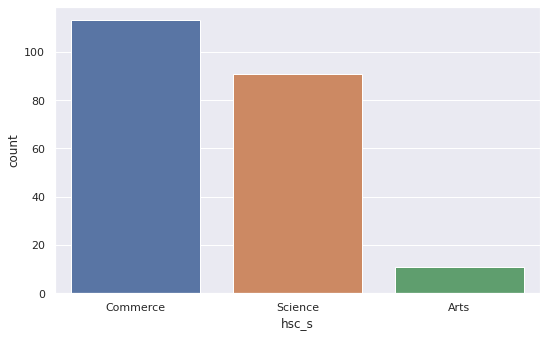

In [18]:
#hsc section
sns.countplot("hsc_s", data=data)

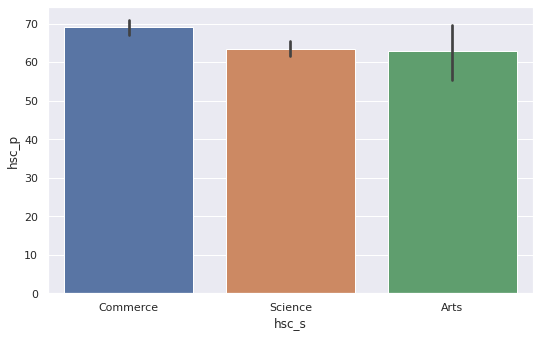

In [19]:
#hsc section vs hsc percentage
ax = sns.barplot(x="hsc_s", y="hsc_p", data=data)

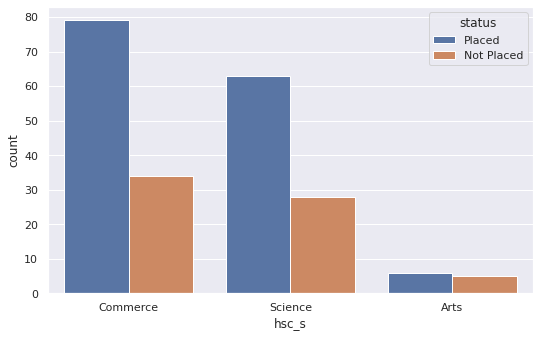

In [20]:
#hsc section vs status 
sns.countplot("hsc_s", hue="status", data=data)

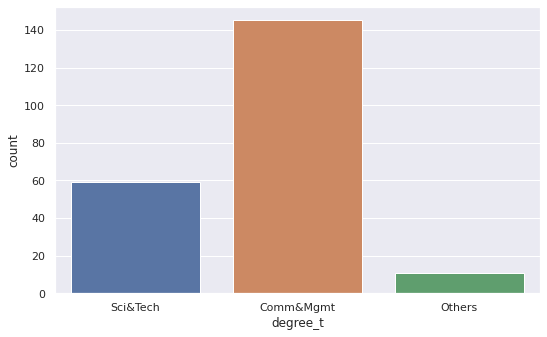

In [21]:
#degree type count
sns.countplot("degree_t", data=data)

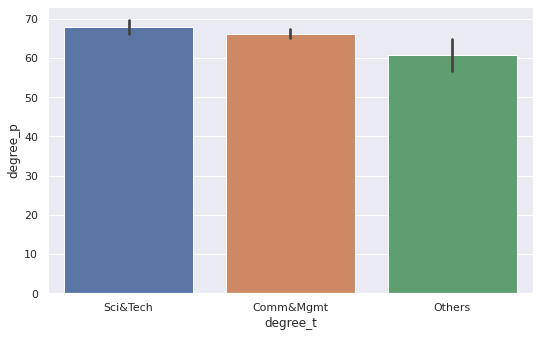

In [22]:
#degree type vs degree percentage
sns.barplot(x="degree_t", y="degree_p", data=data)

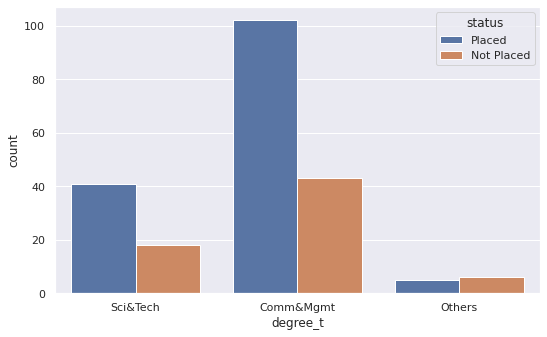

In [23]:
#degree type vs status
sns.countplot("degree_t", hue="status", data=data)

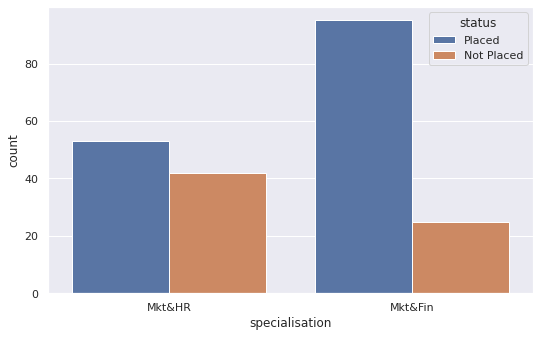

In [24]:
#MBA specialisation count
sns.countplot("specialisation", hue="status", data=data)

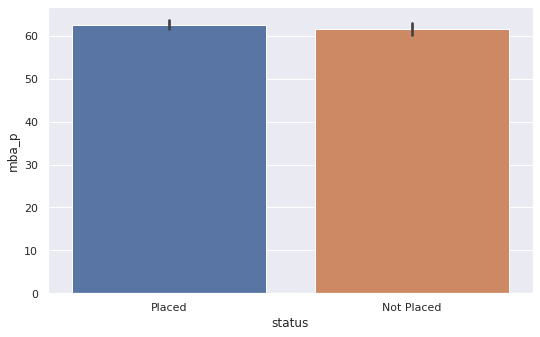

In [25]:
#MBA percentage vs status
sns.barplot(x="status", y="mba_p", data=data)

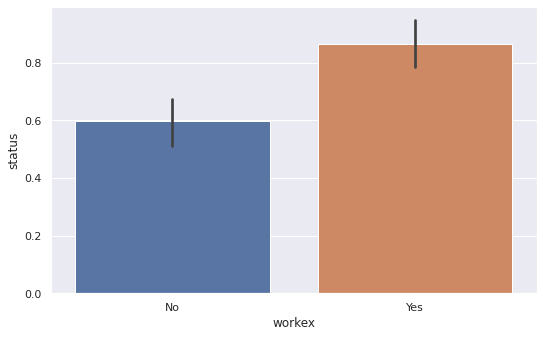

In [26]:
#working experience vs status
map_dict = {"Placed":1,"Not Placed":0}
data['status'] = data['status'].map(map_dict)
sns.barplot(x="workex", y="status", data=data)

In [27]:
map_dict = {"Yes":1,"No":0}
data['workex'] = data['workex'].map(map_dict)

### Which factor influenced a candidate in getting placed?

In [28]:
#show the relation between diffrent qualification placement status usinng correlation.
print('ssc_p to placement ', round(data['status'].corr(data['ssc_p'])*100,1),'%')
print('hsc_p to placement ', round(data['status'].corr(data['hsc_p'])*100,1),'%')
print('mba_p to placement ', round(data['status'].corr(data['mba_p'])*100,1),'%')
print('degree_p to placement ', round(data['status'].corr(data['degree_p'])*100,1),'%')
print('etest_p to placement ', round(data['status'].corr(data['etest_p'])*100,1),'%')
print('workexp to placement ', round(data['status'].corr(data['workex'])*100,1),'%')
#ssc_p feature data factor influenced a candidate in getting placed.
#when we see the correlation between features and placement then it show me the ssc_p data to more correlated to placcement.

ssc_p to placement  60.8 %
hsc_p to placement  49.1 %
mba_p to placement  7.7 %
degree_p to placement  48.0 %
etest_p to placement  12.8 %
workexp to placement  27.6 %


### Which degree specialization is much demanded by corporate?

specialisation in Mkt&Fin 120
specialisation in Mkt&HR 95


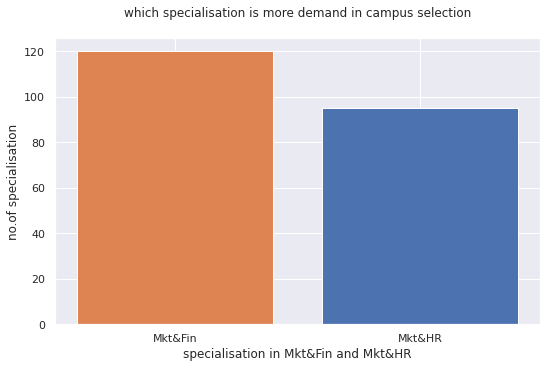

In [29]:
plt.bar([1],height=len(data[data["specialisation"]=="Mkt&HR"]))
plt.bar([0],height=len(data[data["specialisation"]=="Mkt&Fin"]))
plt.xlabel("specialisation in Mkt&Fin and Mkt&HR")
plt.ylabel("no.of specialisation")
print("specialisation in Mkt&Fin "+ str(len(data[data["specialisation"]=="Mkt&Fin"])))
print("specialisation in Mkt&HR "+ str(len(data[data["specialisation"]=="Mkt&HR"])))
plt.xticks(np.arange(2), ('Mkt&Fin', 'Mkt&HR'))
plt.title("which specialisation is more demand in campus selection\n")
plt.show()

# Data Preprocessing

In [30]:
data['status'].unique()

array([1, 0])

In [31]:
data['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [32]:
data['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [33]:
data['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [34]:
data.drop(['sl_no','salary','ssc_b','hsc_b'], axis=1, inplace=True)

In [35]:
map_dict = {"Sci&Tech":0,"Comm&Mgmt":1,"Others":2}
data['degree_t'] = data['degree_t'].map(map_dict)

In [36]:
map_dict = {"M":0,"F":1}
data['gender'] = data['gender'].map(map_dict)

In [37]:
map_dict = {"Commerce":0,"Science":1,"Arts":2}
data['hsc_s'] = data['hsc_s'].map(map_dict)

In [38]:
map_dict = {"Mkt&HR":0,"Mkt&Fin":1}
data['specialisation'] = data['specialisation'].map(map_dict)

In [39]:
data.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,0,58.00,0,0,55.0,0,58.80,1
1,0,79.33,78.33,1,77.48,0,1,86.5,1,66.28,1
2,0,65.00,68.00,2,64.00,1,0,75.0,1,57.80,1
3,0,56.00,52.00,1,52.00,0,0,66.0,0,59.43,0
4,0,85.80,73.60,0,73.30,1,0,96.8,1,55.50,1


In [40]:
numcols = data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index

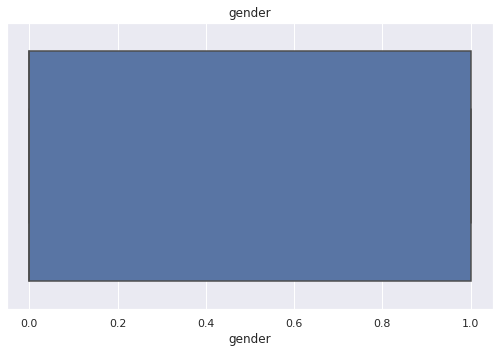

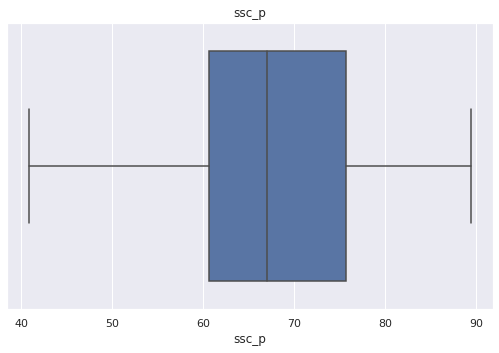

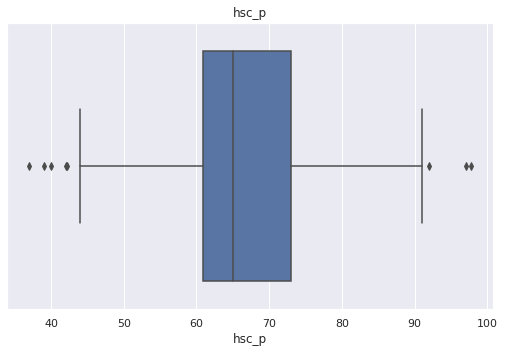

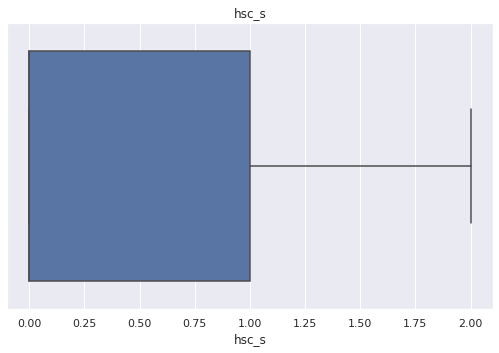

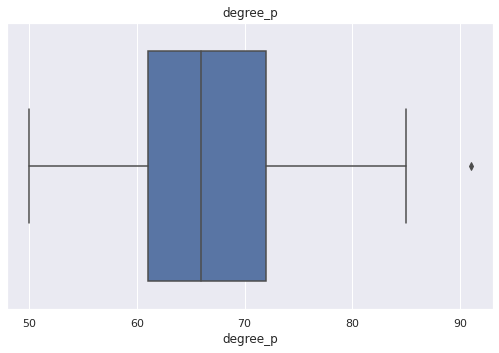

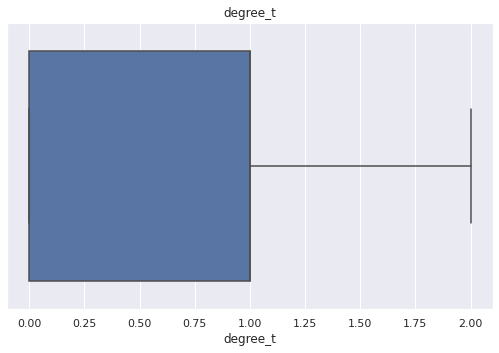

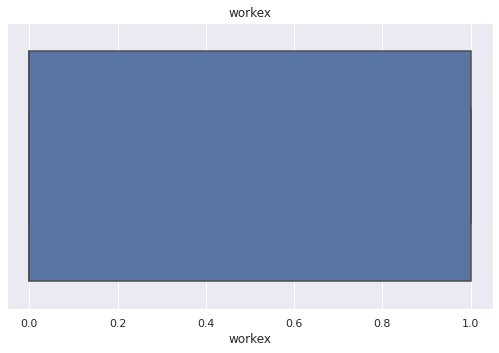

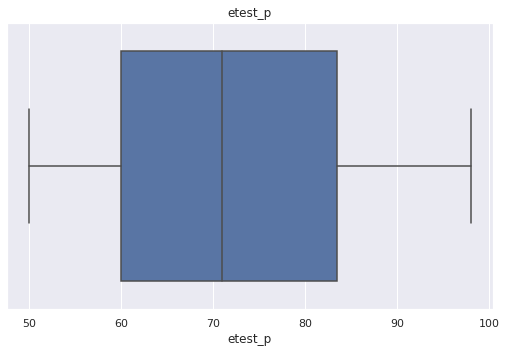

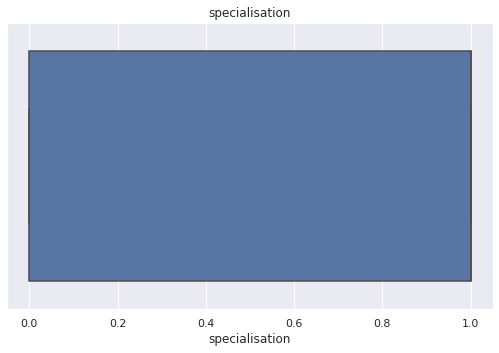

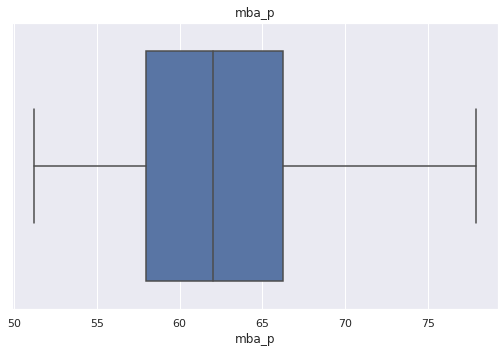

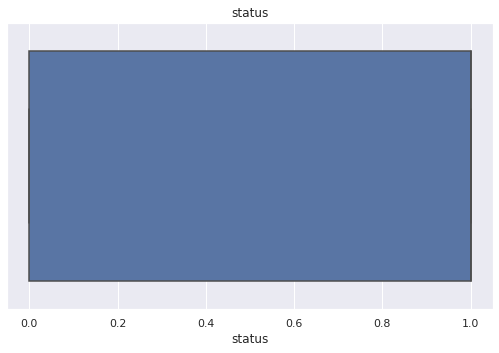

In [41]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [42]:
for x in numcols:
    desc = data[x].describe()
    IQR = desc ['75%']-desc['25%']
    upper=desc['75%']+1.5 *IQR
    lower=desc['25%']-1.5*IQR
    data[x][data[x]>upper]=upper
    data[x][data[x]<lower]=lower

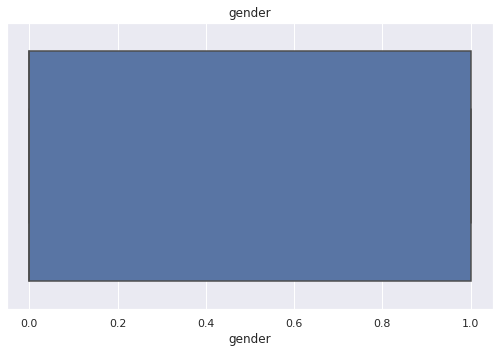

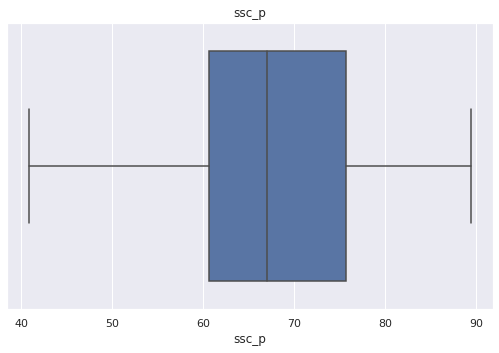

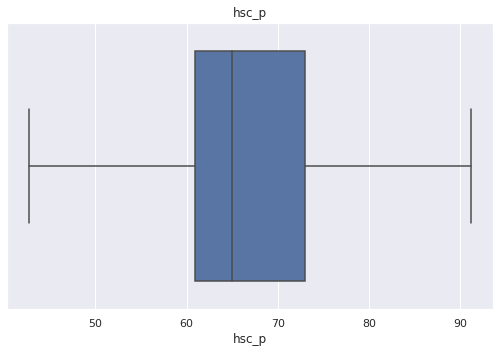

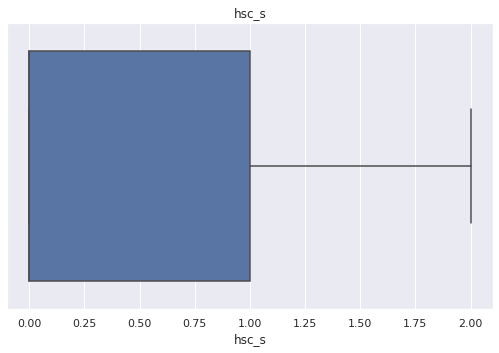

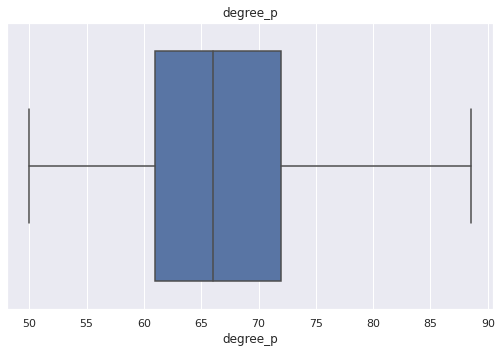

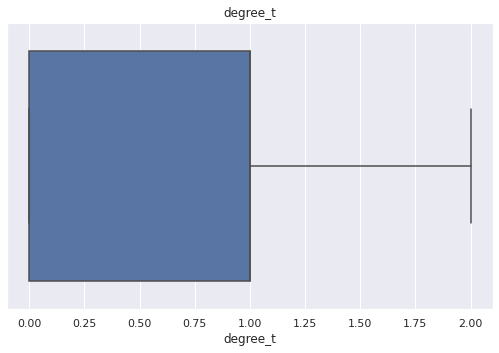

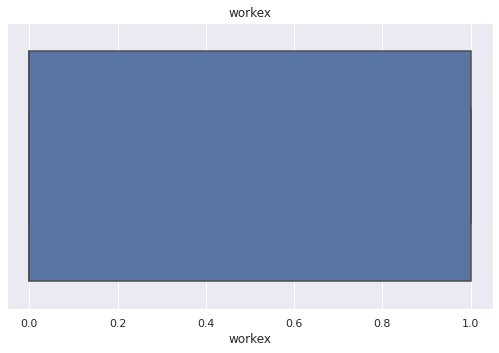

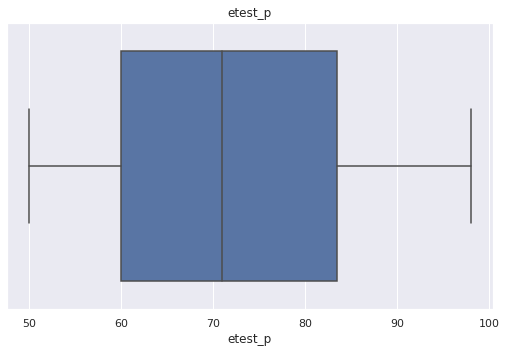

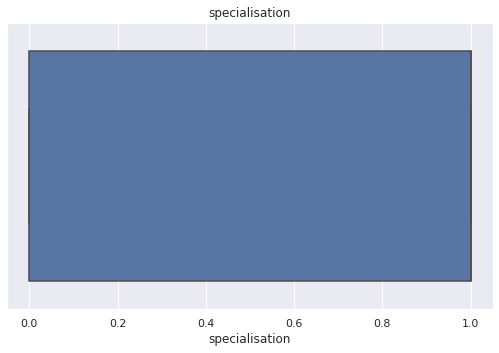

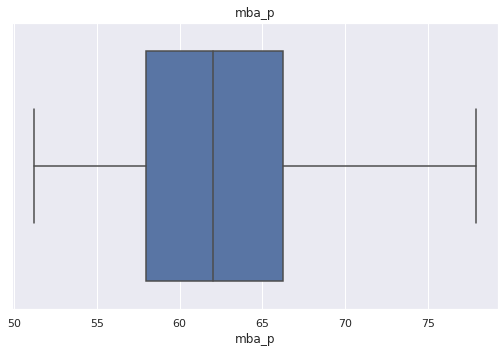

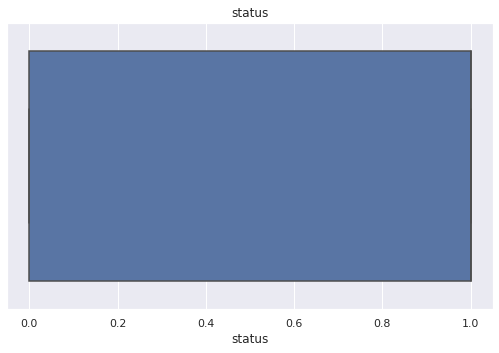

In [43]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [44]:
y = data['status']
X = data.drop("status",axis=1)

In [45]:
X.shape

(215, 10)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33,random_state=50)

# LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [48]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [49]:
ypred=classifier.predict(X_test)

In [50]:
ypred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1])

In [51]:
classifier.score(X_train,y_train)

0.8958333333333334

In [52]:
classifier.score(X_test,y_test)

0.8873239436619719

In [53]:
accuracy = accuracy_score(y_test,ypred)
accuracy

0.8873239436619719

In [54]:
lr_accuracy = accuracy*100
lr_accuracy

88.73239436619718

In [55]:
confusion_matrix(y_test,ypred)

array([[12,  5],
       [ 3, 51]])

In [56]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.91      0.94      0.93        54

    accuracy                           0.89        71
   macro avg       0.86      0.83      0.84        71
weighted avg       0.88      0.89      0.88        71



# Logistic Regression With Hyper parameter tuning

In [57]:
#hyper parameters
from sklearn.model_selection import GridSearchCV #this is used for hyper parameter tuning

solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty_values = ['l1', 'l2', 'elasticnet', 'none']
parameters = {'solver':solver_values , 'penalty': penalty_values }

In [58]:
linear_classifier = GridSearchCV(classifier, parameters)
linear_classifier.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [59]:
linear_classifier.best_estimator_

LogisticRegression()

In [60]:
linear_classifier.best_params_

{'penalty': 'l2', 'solver': 'lbfgs'}

In [61]:
linear_classifier_final = LogisticRegression(penalty = 'l2',solver='lbfgs')
linear_classifier_final.fit(X_train, y_train)

LogisticRegression()

In [62]:
y_pred=linear_classifier_final.predict(X_test)

In [63]:
confusion_matrix(y_test,y_pred)

array([[12,  5],
       [ 3, 51]])

In [64]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8873239436619719

In [65]:
lrh_accuracy = accuracy*100
lrh_accuracy

88.73239436619718

# Ridge Classifier

In [66]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_classifier = GridSearchCV(ridge, parameters)
ridge_classifier.fit(X_train, y_train)

GridSearchCV(estimator=RidgeClassifier(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [67]:
ridge_classifier.best_params_

{'alpha': 20}

In [68]:
ridge_classifier = RidgeClassifier(alpha=20)

ridge_classifier.fit(X_train,y_train)

RidgeClassifier(alpha=20)

In [69]:
y_pred_ridge=ridge_classifier.predict(X_test)

In [70]:
confusion_matrix(y_test,y_pred_ridge)

array([[13,  4],
       [ 3, 51]])

In [71]:
accuracy = accuracy_score(y_test,y_pred_ridge)
accuracy 

0.9014084507042254

In [72]:
rc_accuracy = accuracy*100 
rc_accuracy

90.14084507042254

# Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier()

In [74]:
n_estimators=[25,50,75,100] 
criterion=['gini','entropy'] 
max_depth=[3,5,10] 
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth} 
RFC_cls = GridSearchCV(cls, parameters)
RFC_cls.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100]})

In [75]:
RFC_cls.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 75}

In [76]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10)

In [77]:
cls.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50)

In [78]:
y_pred=cls.predict(X_test)

In [79]:
confusion_matrix(y_test,y_pred)

array([[10,  7],
       [ 2, 52]])

In [80]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8732394366197183

In [81]:
rfc_accuracy = accuracy*100
rfc_accuracy

87.32394366197182

In [82]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.91      0.94      0.93        54

    accuracy                           0.89        71
   macro avg       0.86      0.83      0.84        71
weighted avg       0.88      0.89      0.88        71



# XG Boost

In [83]:
import xgboost as xgb
classifier = xgb.XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
accuracy

[[12  5]
 [ 3 51]]


0.8873239436619719

In [85]:
xg_accuracy = accuracy*100
xg_accuracy

88.73239436619718

In [86]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 79.81 %


# XG Boost Hyperparameter Tuning

In [87]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [88]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=5000, early_stopping_rounds=5, metrics="error", as_pandas=True, seed=123)

In [89]:
cv_results

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.186027,0.023602,0.227830,0.025526
1,0.181365,0.030009,0.227830,0.025526
2,0.174372,0.024512,0.176578,0.062076


In [90]:
parameters={"objective":["binary:logistic"],'colsample_bytree': [0.3],'learning_rate': [0.1],
                'max_depth': [5], 'alpha': [10],'n_estimators':[6]}

In [91]:
xgb_final = GridSearchCV(classifier, parameters)
xgb_final.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                            

In [92]:
xgb_final.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1])

In [93]:
y_pred = xgb_final.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
accuracy

[[13  4]
 [ 2 52]]


0.9154929577464789

In [94]:
xght_accuracy = accuracy*100
xght_accuracy

91.54929577464789

# SVM

In [95]:
from sklearn.svm import SVC
cls=SVC()

In [96]:
parameters = {'C':[0.001,0.1,10], 'gamma':[0.1,0.01],'kernel':['rbf','linear']}

In [97]:
grid=GridSearchCV(cls, parameters,cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 10], 'gamma': [0.1, 0.01],
                         'kernel': ['rbf', 'linear']})

In [98]:
grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [99]:
svclassifier=SVC(C=0.1,gamma=0.1,kernel='linear',probability=True)
svclassifier.fit(X_train,y_train)

SVC(C=0.1, gamma=0.1, kernel='linear', probability=True)

In [100]:
ypred=svclassifier.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,ypred)
accuracy

0.8732394366197183

In [102]:
svm_accuracy = accuracy*100
svm_accuracy

87.32394366197182

In [103]:
confusion_matrix(y_test,ypred)

array([[14,  3],
       [ 6, 48]])

In [104]:
from sklearn.metrics import roc_auc_score
rfc_probs = svclassifier.predict_proba(X_test)
rfc_probs

array([[0.28067763, 0.71932237],
       [0.03679121, 0.96320879],
       [0.6346151 , 0.3653849 ],
       [0.01669341, 0.98330659],
       [0.28943464, 0.71056536],
       [0.07236386, 0.92763614],
       [0.08229881, 0.91770119],
       [0.05642272, 0.94357728],
       [0.90314904, 0.09685096],
       [0.16468249, 0.83531751],
       [0.97956703, 0.02043297],
       [0.5855405 , 0.4144595 ],
       [0.04768223, 0.95231777],
       [0.34248108, 0.65751892],
       [0.22592066, 0.77407934],
       [0.02889512, 0.97110488],
       [0.05919266, 0.94080734],
       [0.19561109, 0.80438891],
       [0.20168197, 0.79831803],
       [0.93278755, 0.06721245],
       [0.02420108, 0.97579892],
       [0.50609362, 0.49390638],
       [0.96495803, 0.03504197],
       [0.01332745, 0.98667255],
       [0.49115073, 0.50884927],
       [0.47247464, 0.52752536],
       [0.87184008, 0.12815992],
       [0.978085  , 0.021915  ],
       [0.75396885, 0.24603115],
       [0.0184193 , 0.9815807 ],
       [0.

In [105]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76        17
           1       0.94      0.89      0.91        54

    accuracy                           0.87        71
   macro avg       0.82      0.86      0.84        71
weighted avg       0.88      0.87      0.88        71



# Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
classifier = GaussianNB()

In [108]:
classifier.fit(X_train,y_train)

GaussianNB()

In [109]:
y_pred = classifier.predict(X_test)

In [110]:
confusion_matrix(y_test,y_pred)

array([[11,  6],
       [ 6, 48]])

In [111]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8309859154929577

In [112]:
nb_accuracy = accuracy*100
nb_accuracy

83.09859154929578

# To save the best model


In [113]:
import joblib
joblib.dump(xgb_final, 'model/Placement_Data_Project.pkl')

['model/Placement_Data_Project.pkl']

In [114]:
model2=joblib.load('model/Placement_Data_Project.pkl')

In [115]:
ypred=model2.predict(X_test)

In [116]:
confusion_matrix(y_test,y_pred)

array([[11,  6],
       [ 6, 48]])

In [117]:
accuracy = accuracy_score(y_test,ypred)
accuracy

0.9154929577464789

In [118]:
xght_accuracy = accuracy*100
xght_accuracy

91.54929577464789

In [119]:
#END